<h1>Final Project</h1>

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

<h2><strong>Task 4: Generate Descriptive Statistics and Visualizations</strong></h2>
For all visualizations, please include a title in each graph and appropriate labels

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot

Provide a  bar plot for the Charles river variable

Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

Create a histogram for the pupil to teacher ratio variable



In [76]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import scipy.stats
import statsmodels.api as sm

In [6]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [51]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'Median value of owner-occupied homes')

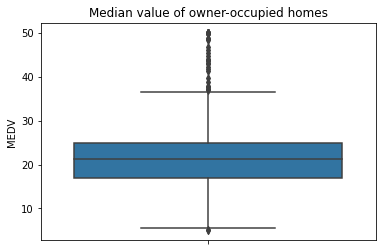

In [14]:
sb.boxplot(y='MEDV', data=boston_df)
plt.title('Median value of owner-occupied homes')

<BarContainer object of 2 artists>

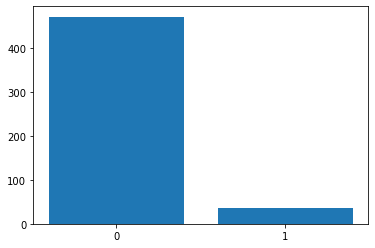

In [50]:
plt.bar(['0','1'],[len(boston_df[boston_df['CHAS'] == 0.0]), len(boston_df[boston_df['CHAS'] == 1.0])])
plt.title()

<AxesSubplot:xlabel='GROUP', ylabel='MEDV'>

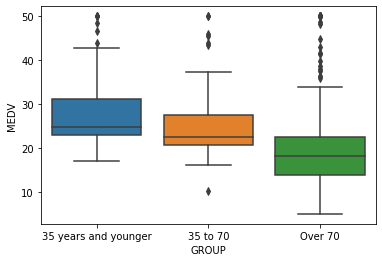

In [57]:
boston_df.loc[(boston_df.AGE<=35), 'GROUP'] = '35 years and younger'
boston_df.loc[(boston_df.AGE>35)&(boston_df.AGE<70), 'GROUP'] = '35 to 70'
boston_df.loc[(boston_df.AGE>=70), 'GROUP'] = 'Over 70'
sb.boxplot(x='GROUP', y='MEDV', data=boston_df, order=['35 years and younger', '35 to 70', 'Over 70'])

Text(0.5, 1.0, 'Relationship Between Nitric Oxide Concentrations and The Proportion of Non-retail Business Acres Per Town')

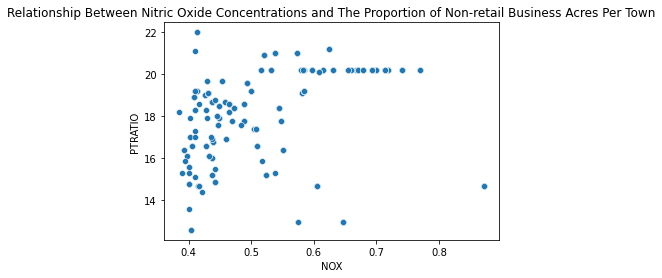

In [61]:
sb.scatterplot(x='NOX', y='PTRATIO', data=boston_df)
plt.title('Relationship Between Nitric Oxide Concentrations and The Proportion of Non-retail Business Acres Per Town')

Text(0.5, 1.0, 'A Histogram for Pupil To Student Ratio')

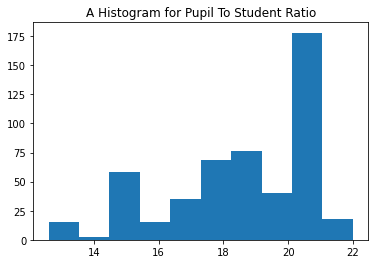

In [62]:
plt.hist(boston_df['PTRATIO'])
plt.title('A Histogram for Pupil To Student Ratio')

In [67]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'],boston_df[boston_df['CHAS']==1.0]['MEDV'],equal_var = True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

# Conclusion 
# The difference between the means is mmeaningful, so null hypotesis is rejected.

In [73]:
f_statistic, p_value=scipy.stats.f_oneway(boston_df[boston_df['GROUP']== '35 years and younger']['MEDV'],boston_df[boston_df['GROUP']== '35 to 70']['MEDV'],boston_df[boston_df['GROUP']== 'Over 70']['MEDV'])
f_statistic

36.40764999196599

In [74]:
p_value

1.7105011022702984e-15

## P value es less than 0.05, so the null hypotesis is rejected

In [75]:
scipy.stats.pearsonr(boston_df['INDUS'],boston_df['NOX'])

(0.7636514469209151, 7.913361061238693e-98)

In [77]:
x=boston_df['DIS']
y=boston_df['MEDV']
x=sm.add_constant(x)
model=sm.OLS(y,x).fit()
predict=model.predict(x)
model.summary()

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 10 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        21:13:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""